In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Lecture et affichage du dataset

In [2]:
data = pd.read_csv("card_transdata.csv")
data.head(50)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


## dimensions des variables

In [3]:
data.shape

(1000000, 8)

Le dataset conitient 1000000 d'individus et 8 variables

## Affichage des colonnes

In [4]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Le dataset contient 7 descripteurs et la cible qui est "fraud"

## Type de variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation des valeurs nulles

In [7]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Le dataset ne contient pas de valeurs nulles

### Visualisation de la cible

In [8]:
data.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [9]:
f = 87403*100/1000000
f

8.7403

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

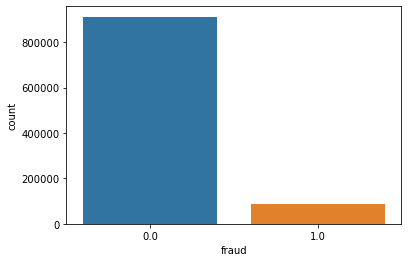

In [9]:
#Visualisation de la cible
sns.countplot('fraud',data=data)

#### On remarque que le nombre de fraud (87403*100/1000000 = 8.74) avoisinne les 9%

In [3]:
data.online_order.value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

#### On remaruqe qu'environ 2/3 des transactions sont des transactions en ligne.

In [12]:
a = np.logical_and(data["fraud"], data["online_order"])
a

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [13]:
np.logical_and(data["fraud"], data["online_order"]).value_counts(True)

False    0.917289
True     0.082711
dtype: float64

In [14]:
P =  82711*100/87403
P

94.63176321178906

In [16]:
np.logical_and(data["used_pin_number"], data["online_order"]).value_counts(True)

False    0.934591
True     0.065409
dtype: float64

In [19]:
np.logical_and(data["fraud"], data["used_pin_number"]).value_counts(True)

False    0.999727
True     0.000273
dtype: float64

In [18]:
a = 2241 + 82711
a

84952

In [20]:
np.logical_and(data["fraud"], data["used_chip"]).value_counts(True)

False    0.97759
True     0.02241
dtype: float64

In [19]:
np.logical_and(data["repeat_retailer"], data["fraud"]).value_counts(True)

False    0.923075
True     0.076925
dtype: float64

## Visualisation des données aberrantes

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_from_home'>

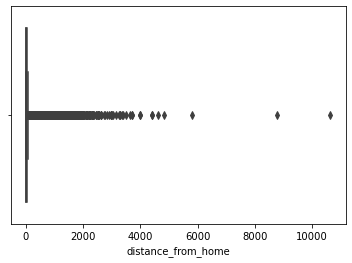

In [21]:
#Données aberrantes de la variable distance_from_home
sns.boxplot(data['distance_from_home'])

In [22]:
# Position of the Outlier
print(np.where(data['distance_from_home']>5000))

(array([266995, 326661, 847723], dtype=int64),)


In [23]:
colonnes = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

In [24]:
data1 = data.copy()

In [25]:
data1['Log_home'] = np.log10(data1['distance_from_home'])
data1['Log_trans'] = np.log10(data1['distance_from_last_transaction'])
data1['Log_ratio'] = np.log10(data1['ratio_to_median_purchase_price'])

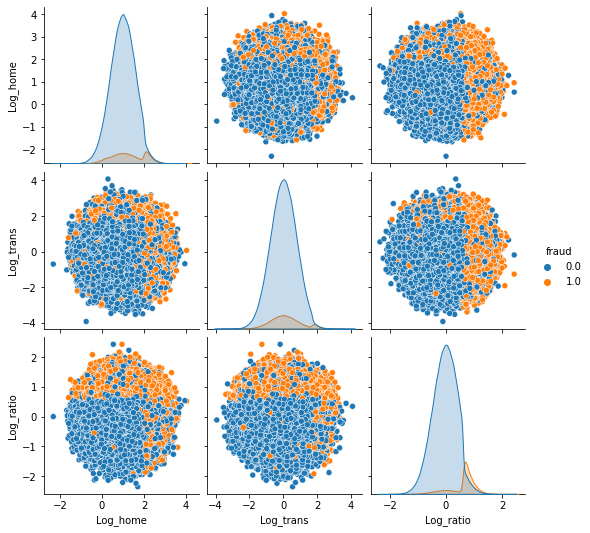

In [29]:
sns.pairplot(data=data1[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

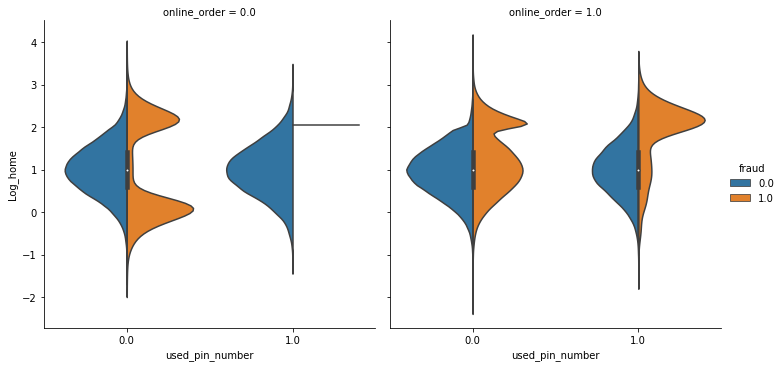

In [28]:
sns.catplot(data=data1,x='used_pin_number',y='Log_home',hue='fraud',\
            col='online_order',kind="violin",split=True)
plt.show()

<AxesSubplot:xlabel='fraud', ylabel='count'>

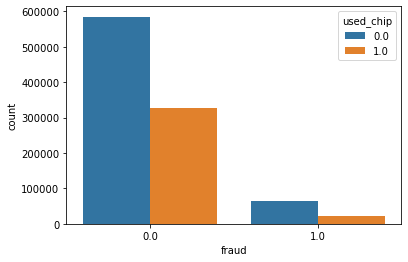

In [29]:
sns.countplot(data=data1, x="fraud", hue="used_chip")

In [30]:
data.used_chip.value_counts()

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

### Réalisation de la standardisation des données en vue d’une analyse ACP

In [31]:
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [32]:
df = data.copy()
df1 =df.iloc[:,:-1]
df1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [33]:
scaler = preprocessing.StandardScaler()
data_std = scaler.fit_transform(df1)
data_std

array([[ 0.47788202, -0.18284892,  0.04349141, ...,  1.36157608,
        -0.33445812, -1.36442519],
       [-0.24160679, -0.18809398, -0.18930045, ..., -0.73444298,
        -0.33445812, -1.36442519],
       [-0.3293694 , -0.16373307, -0.49881185, ..., -0.73444298,
        -0.33445812,  0.73290937],
       ...,
       [-0.36264968, -0.13790278, -0.57369398, ...,  1.36157608,
        -0.33445812,  0.73290937],
       [-0.34209827, -0.1855234 , -0.48162807, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [ 0.48140344, -0.18257921, -0.51338354, ...,  1.36157608,
        -0.33445812,  0.73290937]])

### Vérifiez que la moyenne est nulle et l’écart type égal à 1.(Centré et réduit)

In [40]:
# Vérification que  la moyenne est nulle
print(np.mean(data_std, axis=0))
# Vérification que l'ecart-type est egal a 1
print(np.std(data_std, axis=0))

[ 2.27416308e-16  6.13402662e-17 -2.63375100e-16 -1.06048503e-17
 -3.48645557e-17 -8.49098569e-18 -9.10933551e-17]
[1. 1. 1. 1. 1. 1. 1.]


### Déterminez la matrice de corrélation

In [41]:
corr = np.corrcoef(data_std.transpose())
corr

array([[ 1.00000000e+00,  1.92828335e-04, -1.37417918e-03,
         1.43124256e-01, -6.97067124e-04, -1.62218616e-03,
        -1.30112828e-03],
       [ 1.92828335e-04,  1.00000000e+00,  1.01252558e-03,
        -9.28232497e-04,  2.05485576e-03, -8.98643576e-04,
         1.40893152e-04],
       [-1.37417918e-03,  1.01252558e-03,  1.00000000e+00,
         1.37382191e-03,  5.86578668e-04,  9.42204554e-04,
        -3.29814470e-04],
       [ 1.43124256e-01, -9.28232497e-04,  1.37382191e-03,
         1.00000000e+00, -1.34477663e-03, -4.17390572e-04,
        -5.32243090e-04],
       [-6.97067124e-04,  2.05485576e-03,  5.86578668e-04,
        -1.34477663e-03,  1.00000000e+00, -1.39318817e-03,
        -2.18792659e-04],
       [-1.62218616e-03, -8.98643576e-04,  9.42204554e-04,
        -4.17390572e-04, -1.39318817e-03,  1.00000000e+00,
        -2.90993824e-04],
       [-1.30112828e-03,  1.40893152e-04, -3.29814470e-04,
        -5.32243090e-04, -2.18792659e-04, -2.90993824e-04,
         1.0000000

### Visualisation de la Correlation avec la carte de chaleur

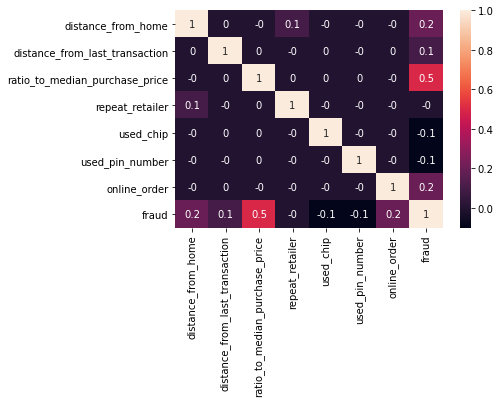

In [42]:
sns.heatmap(data=data.corr().round(1), annot=True)
None

## Déterminez les valeurs propres. Que pensez-vous de leur sommes ?

In [46]:
eigval , vectors = np.linalg.eig(corr)
print('Les valeurs propres sont : ' , '\n' , eigval.round(2) , ' \n ' )
print('Les vecteurs propres sont : ' , '\n ' , vectors.round(2))

Les valeurs propres sont :  
 [0.86 1.14 1.   1.   1.   1.   1.  ]  
 
Les vecteurs propres sont :  
  [[-0.71  0.71 -0.01  0.    0.01  0.01  0.  ]
 [ 0.01 -0.   -0.62 -0.58  0.48 -0.15  0.16]
 [-0.01 -0.   -0.2  -0.03 -0.6  -0.73  0.26]
 [ 0.71  0.71  0.    0.01  0.   -0.01  0.01]
 [ 0.   -0.01 -0.64  0.75  0.12 -0.   -0.12]
 [-0.01 -0.01  0.42  0.28  0.62 -0.57  0.18]
 [-0.   -0.01  0.    0.15 -0.02  0.34  0.93]]


## Analyse ACP

In [48]:
# Projection des données dans l'espace des composantses principales
acp = PCA(svd_solver='full' , n_components=None )
# Transformation en composantses principales
df_acp = acp.fit_transform(data_std)

In [49]:
#Les facteurs principaux 
print(acp.components_)

[[ 7.07017593e-01 -3.72278637e-03 -1.14052510e-04  7.06987728e-01
  -1.00266517e-02 -9.93367812e-03 -9.02173796e-03]
 [ 6.90272196e-03  6.16613515e-01  1.95600620e-01 -4.15417770e-04
   6.39449102e-01 -4.15429976e-01 -1.76953817e-03]
 [-5.50713346e-03  1.50938666e-01  7.29899108e-01  1.01924436e-02
   3.02074459e-03  5.73693550e-01 -3.39407105e-01]
 [ 1.45299867e-03  1.61099635e-01  2.57878098e-01  1.21680818e-02
  -1.15242094e-01  1.79206953e-01  9.28439416e-01]
 [ 1.17921991e-02  4.82520677e-01 -6.01135339e-01  9.03046897e-04
   1.24022724e-01  6.24346687e-01 -2.19045182e-02]
 [-4.79675247e-03  5.81533557e-01  3.06281012e-02 -8.55281264e-03
  -7.49882074e-01 -2.76111160e-01 -1.49077105e-01]
 [ 7.07024731e-01 -5.55508391e-03  1.35936386e-02 -7.06995238e-01
  -3.11210794e-03  5.80325527e-03  3.84113451e-03]]


## Déterminez le nombre d’axe à retenir selon deux approches différentes.

### APPROCHE1-Le critère de Kaiser

### APPROCHE2-Règle de coude

In [50]:
vp =acp.explained_variance_ratio_.round(2).reshape(-1, 1)
print(vp)

[[0.16]
 [0.14]
 [0.14]
 [0.14]
 [0.14]
 [0.14]
 [0.12]]


C:\Users\npawi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

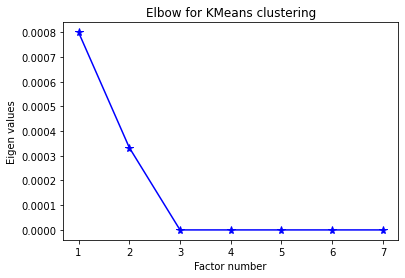

In [51]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(vp)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# print(sse)
# plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'b*-', markersize=8)
plt.plot(marker='o', markersize=16, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlabel('Factor number')
plt.ylabel('Eigen values')
plt.title('Elbow for KMeans clustering')
plt.show()

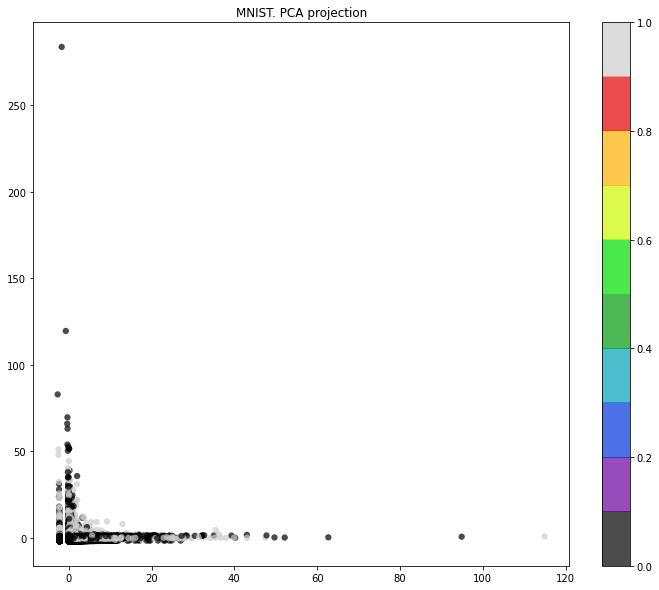

In [52]:
# approche lineaire

plt.figure(figsize=(12,10))
plt.scatter(df_acp[:,0], df_acp[:,1], c=df.fraud,
           edgecolor='none', alpha=0.7, s=40,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

C:\Users\npawi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


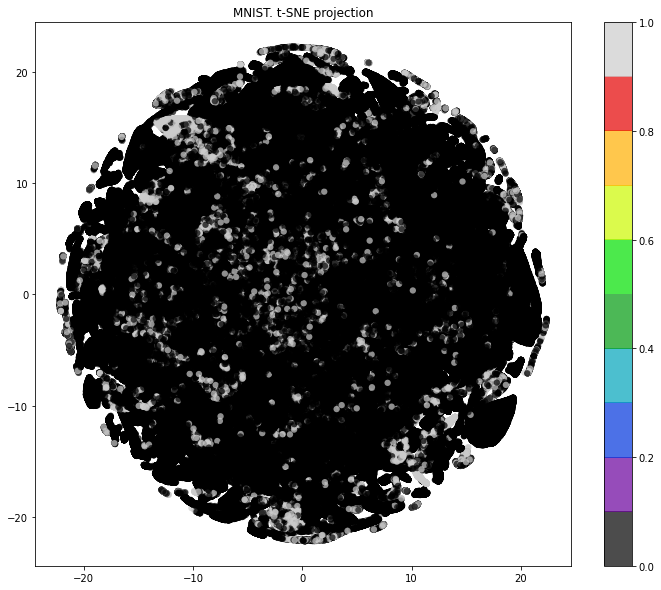

In [53]:
#Approche non-linéaires 
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(df1)
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df.fraud,
           edgecolor='none', alpha=0.7, s=40,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE projection');
# plt.show()

In [54]:
#données d'entrainement et de test
x_train = data.sample(frac=0.8,random_state=200)
x_test = data1.drop(x_train.index)
print(len(x_train))
print(len(x_test))

800000
200000


In [58]:
!pip install xgboost
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [59]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [57]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
662367,113.371928,9.002120,0.176986,1.0,0.0,1.0,1.0,0.0
619619,55.630045,4.621097,0.873250,1.0,0.0,0.0,1.0,0.0
315490,30.230285,0.505793,2.470365,1.0,1.0,0.0,1.0,0.0
826397,150.019406,0.559031,3.672825,1.0,1.0,1.0,1.0,0.0
230304,10.421344,9.525448,0.370389,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
543432,34.024286,4.717636,2.727504,1.0,1.0,0.0,0.0,0.0
269199,7.983185,3.061643,1.779278,1.0,0.0,1.0,1.0,0.0
865725,8.259447,3.092990,0.646274,1.0,1.0,0.0,1.0,0.0
197351,1.634127,0.234929,0.195867,0.0,1.0,0.0,1.0,0.0


In [58]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(x_train.loc[:, x_train.columns != 'fraud'],x_train.fraud)
best_model(log_primal_Grid)

C:\Users\npawi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9588999999999999
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, tol=1e-05)


In [59]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
x_train_pol2 = poly2.fit_transform(x_train.loc[:, x_train.columns != 'fraud'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(x_train_pol2,x_train.fraud)
best_model(log_pol2_Grid)

C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.9410975
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, max_iter=500, solver='liblinear')


C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########## NONNN
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3,,.hbgn refit=True, verbose=0)
SVM_grid.fit(x_train.loc[:, x_train.columns != 'farud'],x_train.fraud)
best_model(SVM_grid)

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train.loc[:, x_train.columns != 'fraud'],x_train.fraud)
best_model(RanFor_grid)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
XGB.fit(x_train.loc[:, x_train.columns != 'fraud'],x_train.fraud)

### Suréchantillonnage

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [34]:
data = pd.read_csv("card_transdata.csv")

In [35]:
data_copy = data.copy()

In [36]:
col_y = data_copy.fraud
col_y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [41]:
X = data_copy.iloc[:,:-1]
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [ ]:
y = data_copy.fraud

In [43]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [44]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1825189    1.0
1825190    1.0
1825191    1.0
1825192    1.0
1825193    1.0
Name: fraud, Length: 1825194, dtype: float64

In [45]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.000000,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.000000,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.000000,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.000000,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.000000,0.0,1.0
...,...,...,...,...,...,...,...
1825189,0.769102,3.916088,7.073403,0.0,1.000000,0.0,1.0
1825190,82.847111,4.337110,4.462085,1.0,0.704119,0.0,1.0
1825191,2.314513,2.903968,8.633567,1.0,0.000000,0.0,1.0
1825192,5.354024,2.824122,5.250655,1.0,1.000000,0.0,1.0


In [49]:
# frames = (X, y)
data_final = pd.concat([X, y], axis = 1)

In [51]:
data_final.fraud.value_counts()

0.0    912597
1.0    912597
Name: fraud, dtype: int64

In [53]:
data_final['Log_home'] = np.log10(data_final['distance_from_home'])
data_final['Log_trans'] = np.log10(data_final['distance_from_last_transaction'])
data_final['Log_ratio'] = np.log10(data_final['ratio_to_median_purchase_price'])

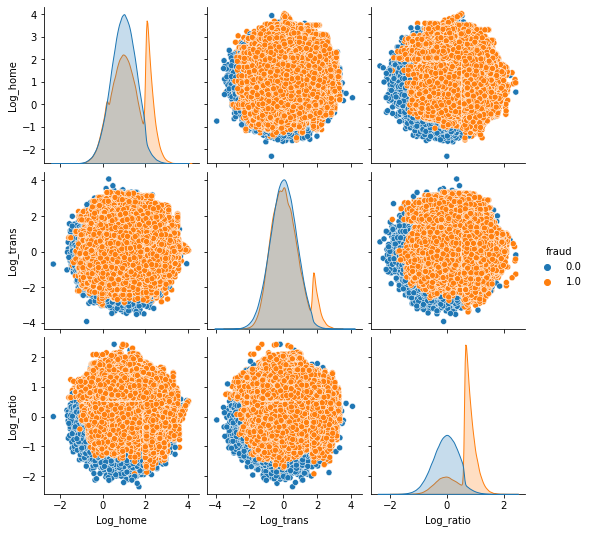

In [54]:
sns.pairplot(data=data_final[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

In [ ]:
sns.catplot(data=data_final,x='used_pin_number',y='Log_home',hue='fraud',\
            col='online_order',kind="violin",split=True)
plt.show()

### Répartition des données d'entrainement et de test

In [56]:
#données d'entrainement et de test
x_train_final = data_final.sample(frac=0.8,random_state=200)
x_test_final = data_final.drop(x_train_final.index)
print(len(x_train_final))
print(len(x_test_final))

1460155
365039


In [62]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(x_train_final.loc[:, x_train_final.columns != 'fraud'],x_train_final.fraud)
best_model(log_primal_Grid)

C:\Users\npawi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9407069811096745
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)


C:\Users\npawi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
x_train_final_pol2 = poly2.fit_transform(x_train_final.loc[:, x_train_final.columns != 'fraud'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(x_train_final_pol2,x_train_final.fraud)
best_model(log_pol2_Grid)  

C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\npawi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [36]:
x_test = [[2.131956, 56.372401, 6.358667, 1.0, 0.0, 0.0, 1.0, 0.328778, 1.751067, 0.803366]]
y_pred = log_primal_Grid.predict(x_test)
print(y_pred)

NameError: name 'log_primal_Grid' is not defined

## Utilisattion des algorithmes d'apprentissage profonds

### Creation des modèles

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = len(X.columns)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()